## Link to our dataset.
www.https://drive.google.com/file/d/1s3hEBguqyu4FqxWc-VDn_S8K4AJaLXiK/view?usp=drivesdk

NB: for our dataset we changed the class names compared to the ones in the link so in the negative class where there is Clear we changed the clear to Negative and for the positive class where we used the unlabeled class, we changed it to Positive.

## Data preprossing

In [1]:
from imblearn.over_sampling import RandomOverSampler

In [2]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

In [3]:
Directory = "C:/Users/hp/Desktop/sickle cell uganda 2024/sickle cell uganda 2024"
Categories = ['Negative','Positive']

In [6]:
#looking through the categories variable first
IMG_SIZE = 150
data = []

for category in Categories:
    folder = os.path.join(Directory, category)
    label  = Categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        #coverting the image to array using cv2 and resizing 
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
         # Convert the image array to numpy array
        img_arr = np.array(img_arr)
        #plt.imshow(img_arr)
        data.append([img_arr, label])

In [7]:
x = []
y = []
for features, labels in data:
    x.append(features)
    y.append(labels)


In [8]:
#converting x and y into arrays
x = np.array(x)
y = np.array(y)

## analysing the data samples

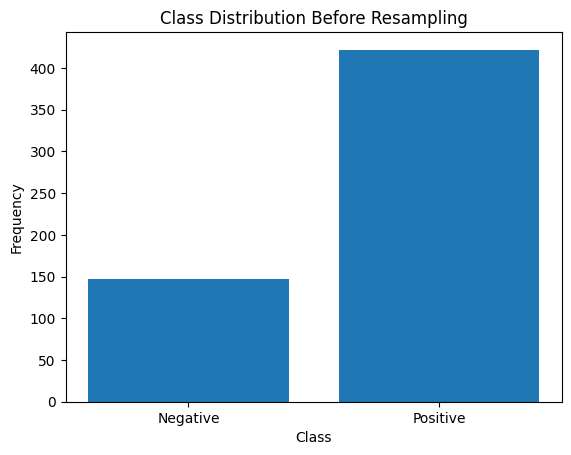

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Analyze class distribution
classes, counts = np.unique(y, return_counts=True)
plt.bar(classes, counts, tick_label=['Negative', 'Positive'])
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


## Resampling 

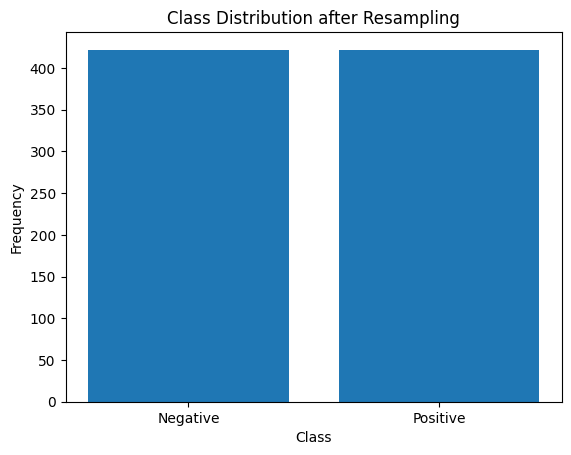

In [10]:
from imblearn.over_sampling import SMOTE

# Resampling the dataset using SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x.reshape(x.shape[0], -1), y)# Flatten x to 2D for resampling and then reshape back to original

# Check new class distribution
classes_res, count_res = np.unique(y_res, return_counts=True)
plt.bar(classes_res, count_res, tick_label=['Negative', 'Positive'])
plt.title('Class Distribution after Resampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [11]:
len(x_res)

844

In [12]:
len(y_res)

844

In [13]:
pickle_out = open("x_res.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y_res.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("x_res.pickle", "rb")
x_res = pickle.load(pickle_in)

In [16]:
x_res[1]

array([[[21, 17, 16],
        [20, 16, 15],
        [21, 17, 16],
        ...,
        [13, 11, 10],
        [11,  9,  8],
        [13, 10, 10]],

       [[22, 18, 17],
        [19, 15, 14],
        [20, 16, 15],
        ...,
        [14, 12, 11],
        [13, 11, 10],
        [13, 11, 10]],

       [[19, 15, 14],
        [21, 17, 16],
        [20, 16, 15],
        ...,
        [14, 12, 11],
        [13, 11, 10],
        [13, 11, 10]],

       ...,

       [[21, 24, 22],
        [22, 25, 23],
        [23, 26, 24],
        ...,
        [25, 24, 20],
        [26, 25, 21],
        [27, 26, 22]],

       [[22, 25, 23],
        [22, 25, 23],
        [21, 24, 22],
        ...,
        [27, 26, 22],
        [27, 26, 22],
        [27, 26, 22]],

       [[22, 26, 24],
        [21, 24, 23],
        [20, 23, 21],
        ...,
        [25, 24, 20],
        [27, 26, 22],
        [28, 27, 23]]], dtype=uint8)

In [27]:
#training cell
from sklearn.model_selection import train_test_split

#splitting resampled data into training and testing sets
x_train,x_val, y_train,y_val = train_test_split(x_res,y_res, test_size = 0.2, random_state=42)

### Defining and training the model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.metrics import Precision, Recall, F1Score
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import time

In [21]:
x_res = np.array(pickle.load(open('x.pickle', 'rb')))
y_res = np.array(pickle.load(open('y.pickle', 'rb')))
#scaling
x_res = x_res / 255.0

dense_layers = [0]
layer_sizes =[32]
conv_layers = [3]

In [30]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3,3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))
            
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                #adding the dropout prevents our model from over fitting
                model.add(Dropout(0.3))
                

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',Precision(), Recall()])
            model.fit(x, y, batch_size=10, epochs = 10, validation_split=0.2, callbacks = [tensorboard])
model.save('Our-work.keras')

3-conv-32-nodes-0-dense-1713912895
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 453ms/step - accuracy: 0.5690 - loss: 8.4016 - precision_1: 0.6688 - recall_1: 0.6748 - val_accuracy: 0.8860 - val_loss: 0.2604 - val_precision_1: 1.0000 - val_recall_1: 0.8860
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.6967 - loss: 0.6276 - precision_1: 0.7438 - recall_1: 0.8476 - val_accuracy: 0.7807 - val_loss: 0.4993 - val_precision_1: 1.0000 - val_recall_1: 0.7807
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.7197 - loss: 0.5513 - precision_1: 0.7560 - recall_1: 0.8694 - val_accuracy: 0.9737 - val_loss: 0.1480 - val_precision_1: 1.0000 - val_recall_1: 0.9737
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 396ms/step - accuracy: 0.7213 - loss: 0.5347 - precision_1: 0.7549 - recall_1: 0.8706 - val_accuracy: 0.8772 - val_loss: 0.3086 - val_precision_1: 1.0000 - val_recall_1: 0.8772
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.7734 - loss: 0.5050 - 

### Plotting training accuracy and loss accuracy 

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 948ms/step - accuracy: 0.7423 - loss: 0.5049 - precision: 0.7423 - recall: 1.0000 - val_accuracy: 0.7105 - val_loss: 0.6183 - val_precision: 0.7105 - val_recall: 1.0000
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 953ms/step - accuracy: 0.7566 - loss: 0.5084 - precision: 0.7565 - recall: 1.0000 - val_accuracy: 0.7105 - val_loss: 0.5918 - val_precision: 0.7105 - val_recall: 1.0000
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7474 - loss: 0.5037 - precision: 0.7465 - recall: 1.0000 - val_accuracy: 0.7105 - val_loss: 0.6033 - val_precision: 0.7105 - val_recall: 1.0000
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7608 - loss: 0.4951 - precision: 0.7585 - recall: 1.0000 - val_accuracy: 0.7105 - val_loss: 0.6046 - val_precision: 0.7105 - val_recall: 1.0000
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 971ms/step - accuracy: 0.7807 - loss: 0.4423 - precision: 0.7801 - recall: 0.9988 - val_accuracy: 0.7018 - val_loss: 0.5

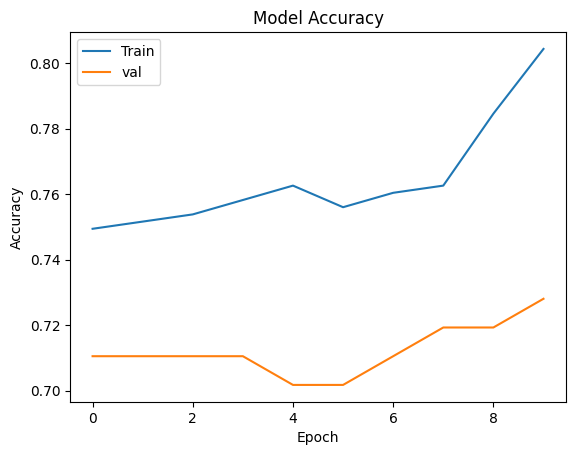

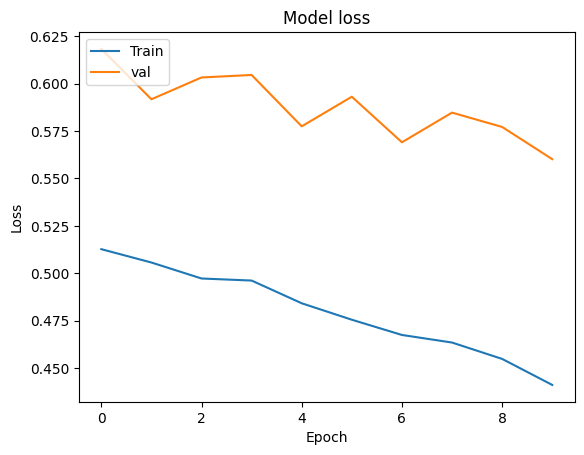

In [29]:
import matplotlib.pyplot as plt

# Training your model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

# Plotting training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()


## Using our model for outside data that we didnt use during testing for our case we shall use the labelled positive images

In [38]:
import cv2
import tensorflow as tf

Categories = ['Negative', 'Positive']

def prepare(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  
    if img_array is None:
        print("Error: Unable to load image at path:", filepath)
        return None
    print("Image loaded successfully:", filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

model = tf.keras.models.load_model("Our-work.keras")

# loading the file path of the image we wanna test
prediction = model.predict([prepare('E:/assignments/assn/Labelled/1.jpg')])

# Extracting the predicted category based on the probability score
predicted_class_index = int(prediction[0][0] >= 0.5)  
predicted_category = Categories[predicted_class_index]

print("Predicted category:", predicted_category)
print("Probability score:", prediction[0][0])


Image loaded successfully: E:/assignments/assn/Labelled/1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted category: Positive
Probability score: 0.96032834


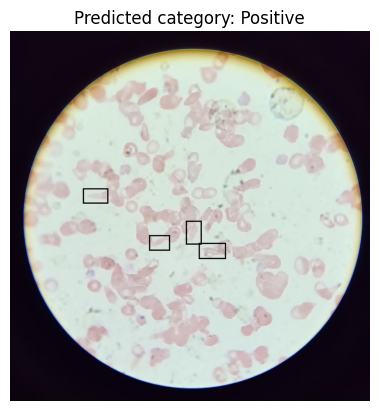

In [43]:
# Load and display the image
image = cv2.imread('E:/assignments/assn/Labelled/1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title(f"Predicted category: {predicted_category}")
plt.axis('off')
plt.show()

### Decision Trees

Accuracy: 0.6228070175438597


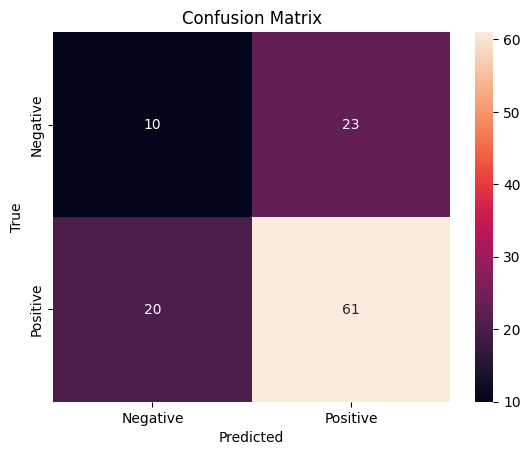

In [46]:
import cv2
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Categories = ['Negative', 'Positive']

# Flatten the image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)

# Define and train the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train_flat, y_train)

# Make predictions on the validation set
y_pred = tree_model.predict(x_val_flat)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate and plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=Categories, yticklabels=Categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Random Forest

Accuracy: 0.6929824561403509


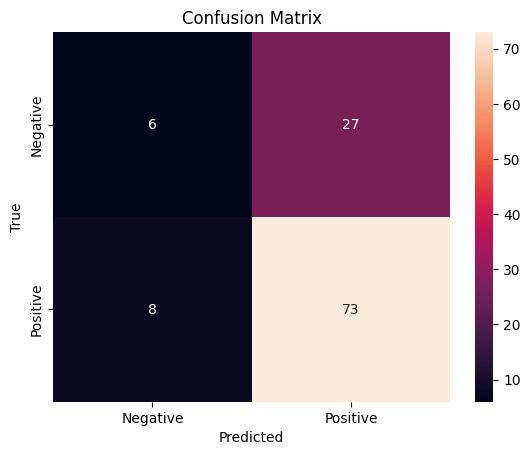

In [48]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(x_train_flat, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(x_val_flat)

# Calculating accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=Categories, yticklabels=Categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7017543859649122


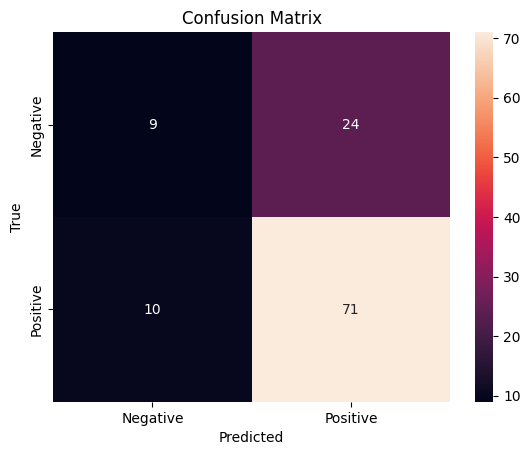

In [49]:
from sklearn.svm import SVC
# Define and train the SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')
svm_model.fit(x_train_flat, y_train)

# Make predictions on the validation set
y_pred = svm_model.predict(x_val_flat)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate and plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=Categories, yticklabels=Categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
